In [1]:
import awkward as ak
import uproot
import time
import matplotlib.pyplot as plt

In [2]:
# Abrir o arquivo ROOT e acessar a árvore
file = uproot.open('/opendata/aula-manipulando-dados/parteII/open-data-example.root')
tree = file['Events;1']

In [3]:
# Carregar as variáveis como arrays
nMuon = tree['nMuon'].array()
muon_pt = tree['Muon_pt'].array()
muon_eta = tree['Muon_eta'].array()

Filtered eta values: [-1.12, -1.16, -0.532, -1, -0.701, -2.15, ..., 1.99, 1.31, 0.262, -1.93, -2.27]
Tempo de processamento (Análise Colunar): 0.0099 segundos


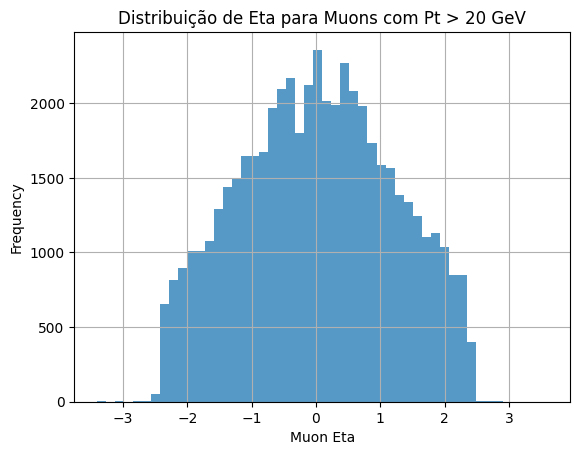

In [4]:
# Iniciar o temporizador
start_time = time.time()

# Máscara para selecionar os múons com pt > 20 GeV
mask = muon_pt > 20.0

# Filtrando os eventos que atendem à condição
filtered_eta = ak.flatten(muon_eta[mask])

# Tempo final
end_time = time.time()

# Exibindo os resultados
print(f"Filtered eta values: {filtered_eta}")
print(f"Tempo de processamento (Análise Colunar): {end_time - start_time:.4f} segundos")

# Plotando os eventos filtrados de eta
plt.hist(filtered_eta, bins=50, alpha=0.75)
plt.xlabel('Muon Eta')
plt.ylabel('Frequency')
plt.title('Distribuição de Eta para Muons com Pt > 20 GeV')
plt.grid(True)
plt.savefig('muon_eta_distribution_colunar.png', dpi=300)
plt.show()
